In [2]:
import zipfile
with zipfile.ZipFile('/content/Copy of devnagari digit.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

In [3]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

x_train = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Train"
x_test= "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Test"

class_names = sorted(os.listdir(x_train))
print(class_names)


['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Load Devanagari dataset (assuming pre-downloaded and unzipped)
def load_images_from_folder(folder, image_size=(32, 32)):
    images = []
    for subdir in os.listdir(folder):
        subfolder = os.path.join(folder, subdir)
        for filename in os.listdir(subfolder):
            img_path = os.path.join(subfolder, filename)
            img = Image.open(img_path).convert('L').resize(image_size)
            images.append(np.array(img))
    return np.array(images)

# Load and normalize
images = load_images_from_folder('/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Train')
images = images / 255.0  # Normalize to [0,1]
images = images.reshape((-1, 32, 32, 1))  # Add channel dimension

# Train-validation split
X_train, X_val = train_test_split(images, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape)

(13600, 32, 32, 1)


In [14]:
def add_gaussian_noise(images, mean=0.2, std=0.4):
    noisy = images + np.random.normal(loc=mean, scale=std, size=images.shape)
    noisy = np.clip(noisy, 0., 1.)
    return noisy

X_train_noisy = add_gaussian_noise(X_train)
X_val_noisy = add_gaussian_noise(X_val)


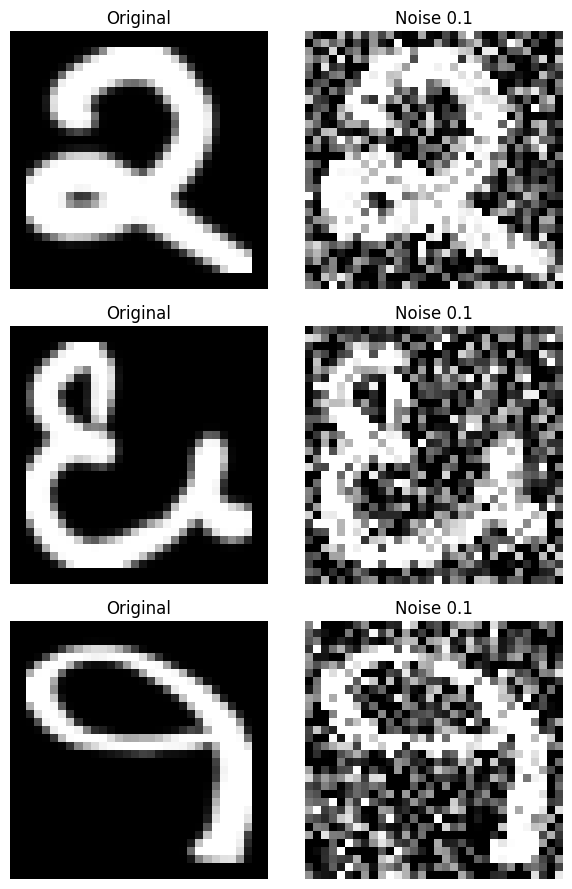

In [15]:
#Visualize in a 3 x 3 grid
n = 3 # number of images to show
plt.figure(figsize=(9, 9))
for i in range(n):
# Original image
  ax = plt.subplot(n, 3, i * 3 + 1)
  plt.imshow(X_train[i].reshape(32, 32), cmap='gray')
  plt.title("Original")
  plt.axis('off')
  # Low noise image
  ax = plt.subplot(n, 3, i * 3 + 2)
  plt.imshow(X_train_noisy[i].reshape(32, 32), cmap='gray')
  plt.title("Noise 0.1")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4130 - val_loss: 0.1857
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1734 - val_loss: 0.1610
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1582 - val_loss: 0.1530
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1528 - val_loss: 0.1497
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1488 - val_loss: 0.1492
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1473 - val_loss: 0.1461
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1457 - val_loss: 0.1443
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1450 - val_loss: 0.1437
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1432 - val_loss: 0.1424
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1418 - val_loss: 0.1422
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1421 - val_loss: 0.1410
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/st

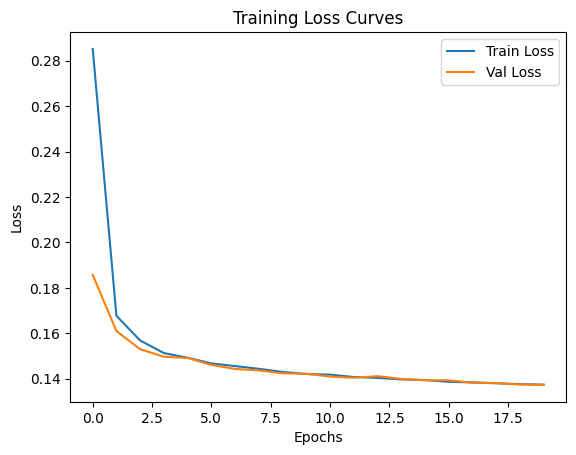

In [17]:
history = autoencoder.fit(
    X_train_noisy, X_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(X_val_noisy, X_val)
)

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Curves')
plt.show()


107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


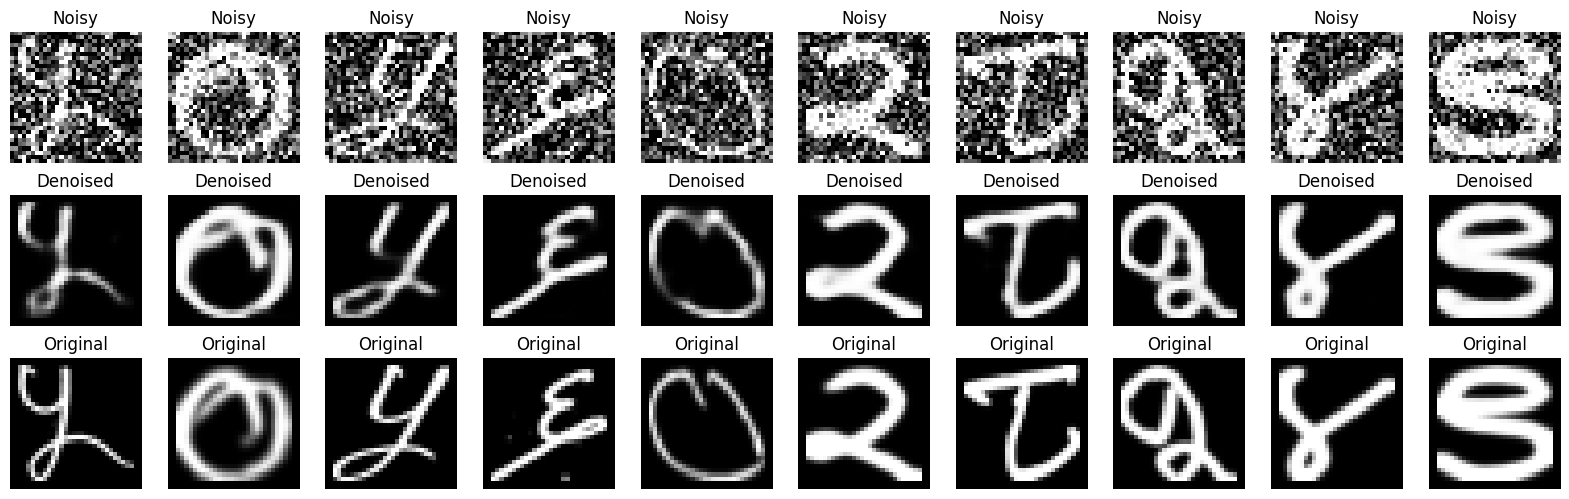

In [18]:
# Predict on validation set
decoded_imgs = autoencoder.predict(X_val_noisy)

# Visualize noisy vs denoised vs original
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_val_noisy[i].reshape(32, 32), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_val[i].reshape(32, 32), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()